<a href="https://colab.research.google.com/github/meetdelvadiya/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Meet_Delvadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

**Data Description** -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution 

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Statements**

In [44]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time
import dateutil

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#**Loading and inspecting data**

---



In [45]:
#Reading a data file  
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")

In [46]:
#It gives Top 5 rows of Dataset 
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [47]:
#It gives last 5 rows of Dataset
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [48]:
# It gives Total number of rows and columns of dataset.
dataset.shape

(2000, 21)

The Dataset has 2000 rows and 21 columns.

In [49]:
#It gives total columns, data types and null count of dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [50]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
battery_power,int64,0,1094
blue,int64,0,2
clock_speed,float64,0,26
dual_sim,int64,0,2
fc,int64,0,20
four_g,int64,0,2
int_memory,int64,0,63
m_dep,float64,0,10
mobile_wt,int64,0,121
n_cores,int64,0,8


As shown above , there are no null values in the dataset. There are 4 unique values in 'price_range'(dependent) variable.

In [51]:
#It gives some basic statistical details like percentile, mean, std, max etc.
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Exploratory Data Analysis**

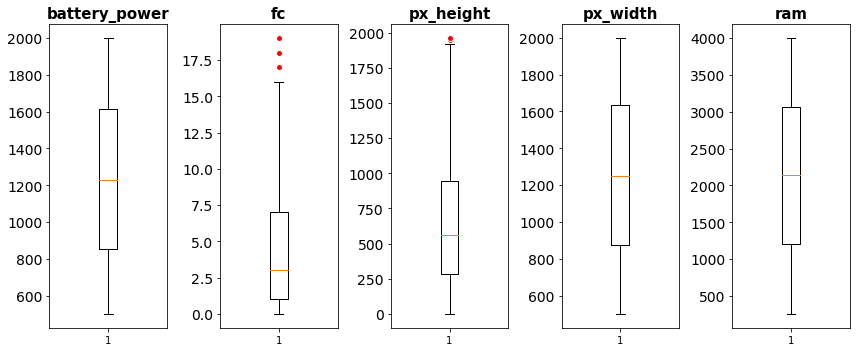

In [52]:
#Creating subplot of each column with its own scale

df = pd.DataFrame(data = dataset, columns=['battery_power','fc','px_height','px_width','ram'])
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(12,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

As shown in figure, There are few outliers present in 'fc' and 'px_height' in dataset.

In [53]:
#Removing outliers

Q1 = dataset['px_height'].quantile(0.25)
Q3 = dataset['px_height'].quantile(0.75)
IQR = Q3 - Q1
all_cols = dataset.columns
idx = dataset[((dataset['px_height'] < (Q1 - 1.5 * IQR)) | (dataset['px_height'] > (Q3 + 1.5 * IQR)))] [all_cols].index
dataset = dataset.drop(dataset.index[idx])
dataset.shape

(1998, 21)

In [54]:
#Removing outliers

Q1 = dataset['fc'].quantile(0.25)
Q3 = dataset['fc'].quantile(0.75)
IQR = Q3 - Q1
all_cols = dataset.columns
idx = dataset[((dataset['fc'] < (Q1 - 1.5 * IQR)) | (dataset['fc'] > (Q3 + 1.5 * IQR)))] [all_cols].index
dataset = dataset.drop(dataset.index[idx])
dataset.shape

(1980, 21)

After removing outliers, there are 1980 rows and 21 columns in dataset.

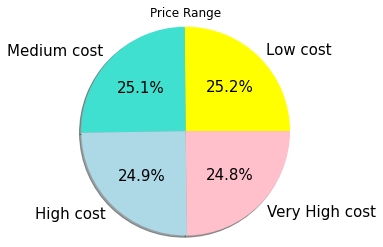

In [55]:
#Creating pie-chart

labels = ["Low cost", "Medium cost", "High cost", "Very High cost"]
values = dataset['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius = 1.2,textprops = {"fontsize":15})
ax1.set_title('Price Range')
plt.show()

As shown above, all phones have equal weightage among price-range.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


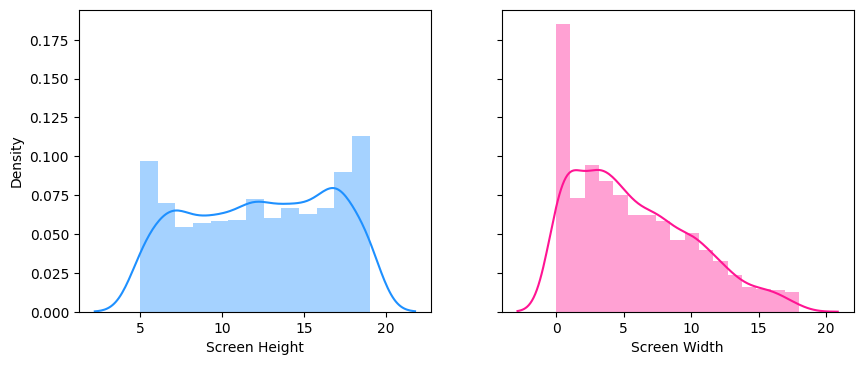

In [56]:
#disrtibution of 'screen height' and 'screen width'

x1 = dataset['sc_h']
x2 = dataset['sc_w']

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Screen Height')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Screen Width')

<Figure size 1080x1008 with 0 Axes>

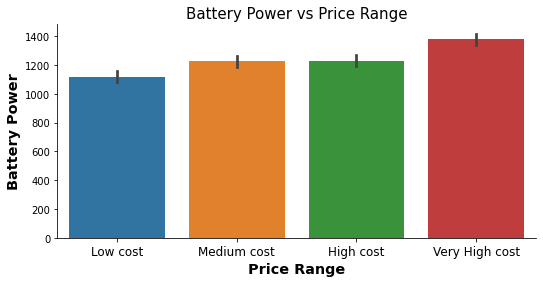

In [57]:
plt.figure(figsize=[15,14])
graph = sns.catplot(x= 'price_range', y = 'battery_power', data = dataset, kind = "bar", height=4,aspect=1.9)
plt.title('Battery Power vs Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Battery Power',fontsize='x-large',fontweight='bold')
plt.show()

As shown above, Price range increases with increment in Battery power capacity.

<Figure size 1080x1008 with 0 Axes>

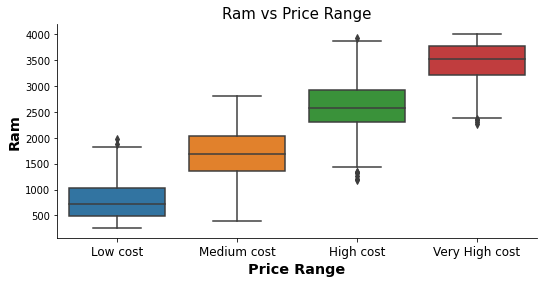

In [58]:
plt.figure(figsize=[15,14])
graph = sns.catplot(x= 'price_range', y = 'ram', data = dataset, kind = "box", height=4,aspect=1.9)
plt.title('Ram vs Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Ram',fontsize='x-large',fontweight='bold')
plt.show()

As shown above, Price range increases with increment in RAM capacity.

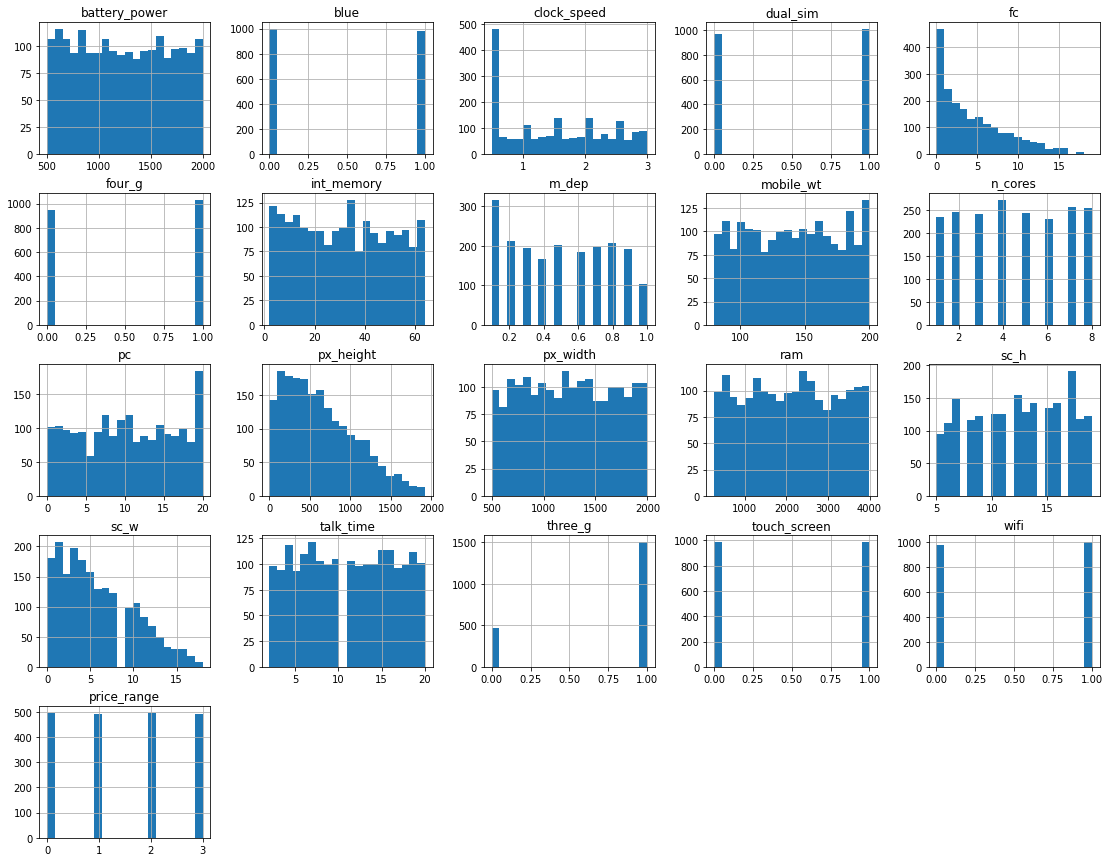

In [59]:
#Histogram
dataset.hist(figsize=(19,15),bins=20)
plt.show()

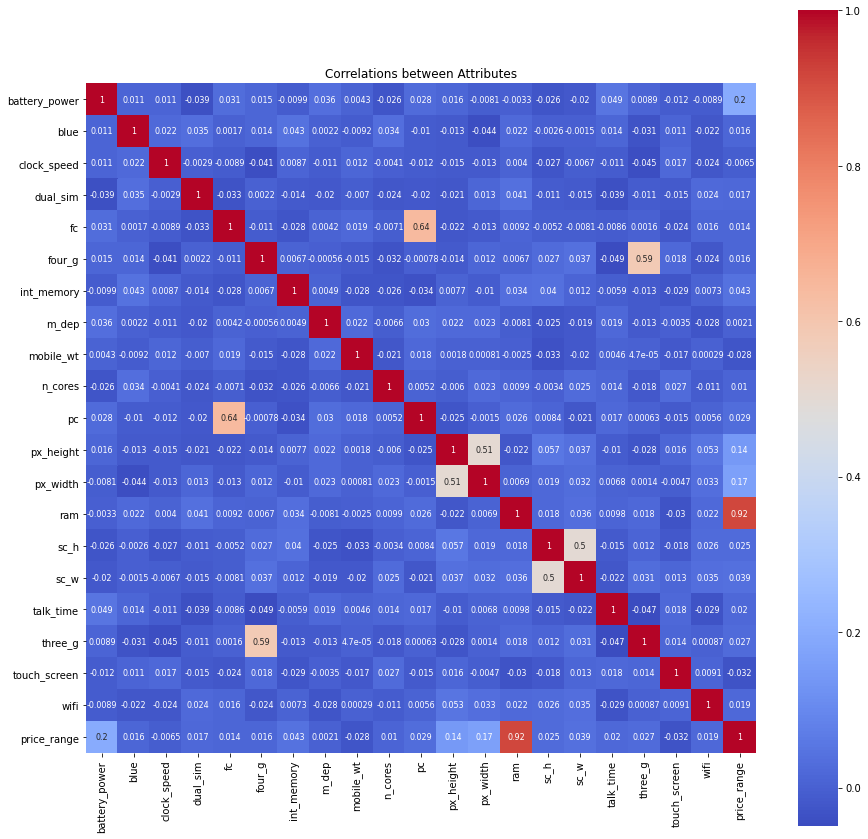

In [60]:
#corelation
fig = plt.subplots (figsize = (15, 15))
sns.heatmap(dataset.corr (), square = True, cbar = True, annot = True, cmap='coolwarm', annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show()